In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def plot_decision_boundary(pred_func,X,y):
    x_min, x_max = X[:, 0].min() - 0.15, X[:, 0].max() + 0.15
    y_min, y_max = X[:, 1].min() - 0.15, X[:, 1].max() + 0.15
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y,s=100)
    plt.show()

In [31]:
data = pd.read_csv('./xor.csv', header=None).to_numpy()
x = data[:4, :-1]
y = data[:4, -1]

In [34]:
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(32),\
                    activation="logistic", random_state=1,max_iter=10000)
clf.fit(x, y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=32, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

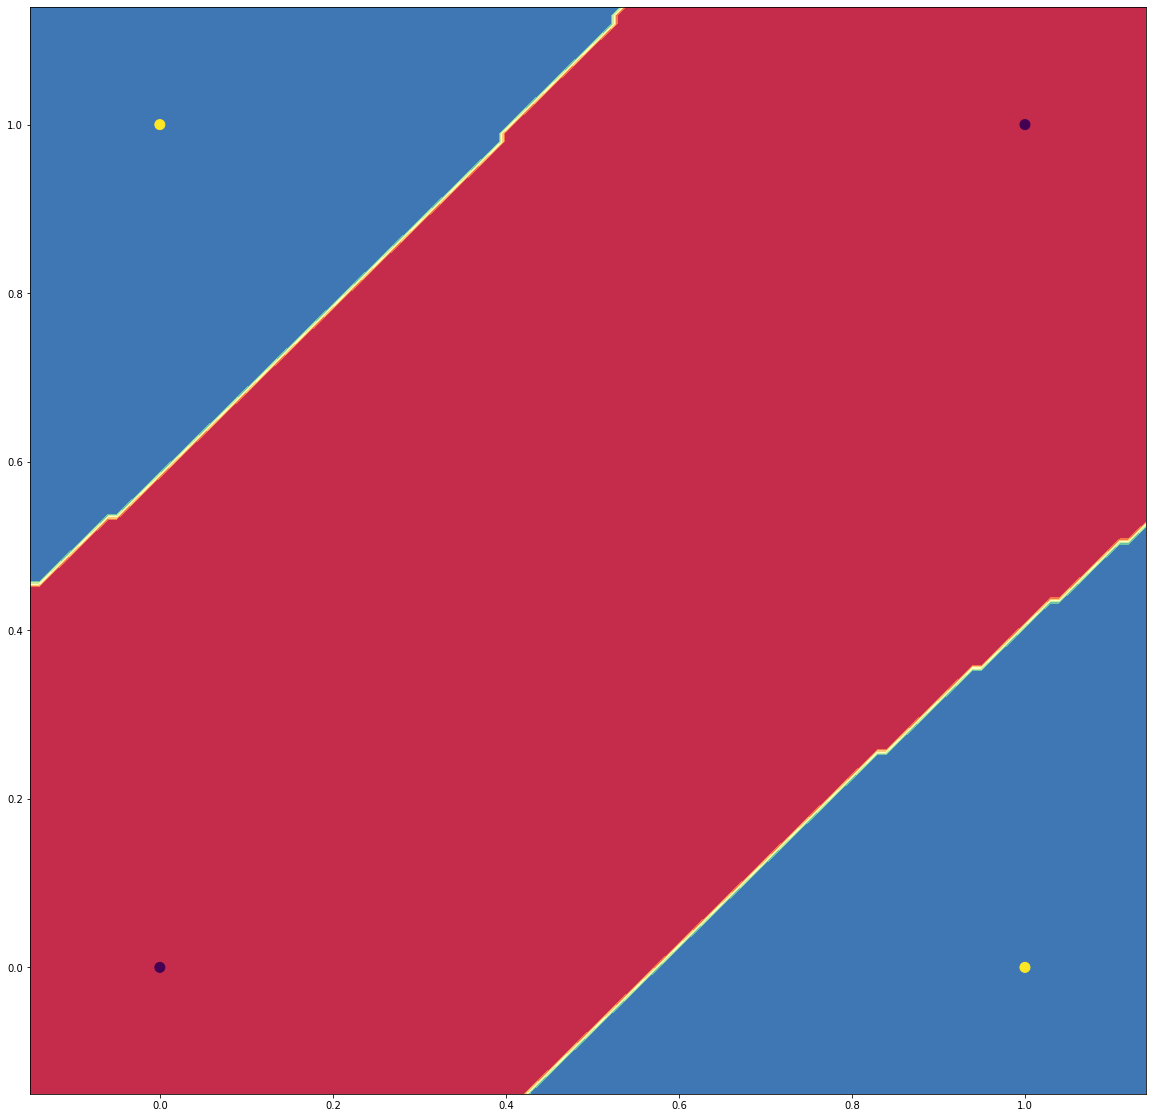

In [35]:
plt.figure(figsize=(20,20))
plot_decision_boundary(lambda x: clf.predict(x), x, y)